In [ ]:
!pip install -r "/content/drive/MyDrive/Colab Notebooks/LEVX_1km/requirements.txt"

In [1]:
!pip install lazypredict

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import plotly.express as px
import pandas as pd
import numpy as np
coor = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/LEPP/input_files/distan_lat42.77lon-1.647p3R12Km.csv")
px.set_mapbox_access_token("pk.eyJ1IjoiZ3JhbmFudHVpbiIsImEiOiJja3B4dGU4OTkwMTFmMm9ycnNhMjJvaGJqIn0.VWzx_PkD9A5cSUVsn_ijCA")
px.scatter_mapbox(coor, hover_data=['distance'],lat='lat', lon='lon',color='distance', title="Nearest points",
                           color_continuous_scale=px.colors.cyclical.IceFire,)

In [3]:
station = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/LEPP/input_files/LEPP2018.csv",
                          usecols =["time","wxcodes_o"],
                          parse_dates=["time"]).dropna().set_index("time")

pd.options.display.max_rows = 999
print("Weather frequencies\n")
station["wxcodes_o"].value_counts(normalize=True).map(lambda n: '{:.2%}'.format(n))

Weather frequencies



M                 85.30%
-RA                5.22%
BR                 1.67%
FG                 1.38%
RA                 0.97%
BCFG               0.61%
-RA BR             0.36%
VCFG               0.32%
BR BCFG            0.31%
FZFG               0.27%
VCTS               0.25%
TS                 0.24%
RA BR              0.23%
-SHRA              0.23%
-TSRA              0.21%
-SN                0.21%
-DZ                0.20%
-UP                0.20%
SHRA               0.18%
SN                 0.16%
TSRA               0.10%
VCSH               0.07%
-DZ BR             0.07%
BCFG BR            0.07%
TS SHRA            0.06%
+RA                0.06%
-SNRA              0.06%
UP                 0.06%
TS -SHRA           0.05%
RASN               0.05%
SN FZFG            0.05%
+SHRA              0.04%
BR -RA             0.04%
-RA FG             0.04%
BR VCFG            0.03%
-SN FZFG           0.03%
-FZUP BR           0.03%
VCTS -SHRA         0.03%
DZ                 0.03%
-UP BR             0.03%


In [4]:
#label SN if weather code contains SN

station["sn_l"] = "No SN"
mask = station['wxcodes_o'].str.contains("SN")
station.loc[mask,["sn_l"]] = "SN"
pd.options.display.max_rows = 999

print(station.sample(50))
print("*****************************")
station["sn_l"].value_counts(normalize=True).transform(lambda x: '{:,.0%}'.format(x))

                    wxcodes_o   sn_l
time                                
2018-08-01 11:30:00         M  No SN
2018-08-06 17:00:00         M  No SN
2018-03-26 20:30:00         M  No SN
2018-12-02 14:00:00         M  No SN
2018-07-03 00:30:00         M  No SN
2018-03-20 05:00:00       -SN     SN
2018-07-03 03:00:00         M  No SN
2018-07-22 12:00:00         M  No SN
2018-03-14 21:30:00       -RA  No SN
2018-01-04 11:30:00         M  No SN
2018-05-05 05:00:00         M  No SN
2018-06-30 05:30:00         M  No SN
2018-05-24 22:00:00         M  No SN
2018-02-24 21:00:00         M  No SN
2018-12-01 03:00:00         M  No SN
2018-07-09 08:00:00         M  No SN
2018-09-02 21:00:00         M  No SN
2018-05-26 22:30:00        TS  No SN
2018-10-21 01:30:00        BR  No SN
2018-12-17 21:00:00         M  No SN
2018-04-10 01:00:00         M  No SN
2018-10-06 08:30:00         M  No SN
2018-10-23 08:00:00         M  No SN
2018-02-16 10:00:00         M  No SN
2018-01-15 19:30:00         M  No SN
2

No SN    99%
SN        1%
Name: sn_l, dtype: object

**Forecast D0**

In [5]:
#Forecast d0
model1k = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/LEPP/input_files/lat42.77lon-1.647p3R12KmD0.csv",parse_dates=["time"]).set_index("time")

model1k

,Unnamed: 0,dir0,snow_prec0,snowlevel0,mod0,wind_gust0,mslp0,temp0,rh0,visibility0,...,cape2,cin2,cfh2,cfl2,cfm2,cft2,HGT5002,HGT8502,T5002,T8502
time,,,,,,,,,,,,,,,,,,,,,
2018-01-01 01:00:00,0,292.052490,0.0,553.941833,0.587827,0.958378,102771.531250,274.759369,0.946349,24224.912109,...,0.0,-0.001094,0.00,0.0,0.0,0.00,5483.839844,1544.834961,244.594223,272.421326
2018-01-01 02:00:00,1,196.488373,0.0,613.525208,1.296904,11.657522,102834.796875,274.350494,0.946008,24224.343750,...,0.0,0.001953,0.00,0.0,0.0,0.00,5499.091797,1549.441040,245.285736,272.807495
2018-01-01 03:00:00,2,186.363007,0.0,661.109863,4.245080,5.900322,102882.640625,274.785828,0.914341,24221.205078,...,0.0,-0.004102,0.00,0.0,0.0,0.00,5511.755859,1552.350952,245.793243,273.134460
2018-01-01 04:00:00,3,189.292435,0.0,694.456299,4.445677,5.976796,102938.546875,275.039307,0.902506,24219.220703,...,0.0,-0.002734,0.00,0.0,0.0,0.00,5524.407227,1558.574951,246.264526,273.393463
2018-01-01 05:00:00,4,194.010376,0.0,726.301025,4.055670,5.694401,102932.867188,275.172119,0.895605,24218.425781,...,0.0,0.001211,0.00,0.0,0.0,0.00,5532.286133,1559.514038,246.827194,273.539368
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-31 19:00:00,8390,1.414751,0.0,1970.248535,6.084242,7.562932,103258.039062,280.895203,0.730230,24041.951172,...,0.0,0.001211,0.30,0.0,0.0,0.30,5738.210938,1633.965942,256.457489,283.896637
2018-12-31 20:00:00,8391,356.427704,0.0,1936.104858,5.687714,7.142657,103287.882812,280.499054,0.743425,24041.025391,...,0.0,-0.000898,0.20,0.0,0.0,0.20,5739.144043,1634.055054,256.369995,283.659424
2018-12-31 21:00:00,8392,352.389984,0.0,1902.936279,5.291308,6.723206,103340.562500,280.019501,0.756728,24041.576172,...,0.0,-0.003398,0.14,0.0,0.0,0.14,5741.472168,1636.801025,256.276123,283.307068


In [6]:
#concat station file versus meteorological model file same time
df_all1k = pd.concat([station,model1k],axis=1).drop(columns=["wxcodes_o","Unnamed: 0"]).dropna()
df_all1k

,sn_l,dir0,snow_prec0,snowlevel0,mod0,wind_gust0,mslp0,temp0,rh0,visibility0,...,cape2,cin2,cfh2,cfl2,cfm2,cft2,HGT5002,HGT8502,T5002,T8502
time,,,,,,,,,,,,,,,,,,,,,
2018-01-01 01:00:00,No SN,292.052490,0.0,553.941833,0.587827,0.958378,102771.531250,274.759369,0.946349,24224.912109,...,0.0,-0.001094,0.000000,0.0,0.0,0.000000,5483.839844,1544.834961,244.594223,272.421326
2018-01-01 02:00:00,No SN,196.488373,0.0,613.525208,1.296904,11.657522,102834.796875,274.350494,0.946008,24224.343750,...,0.0,0.001953,0.000000,0.0,0.0,0.000000,5499.091797,1549.441040,245.285736,272.807495
2018-01-01 03:00:00,No SN,186.363007,0.0,661.109863,4.245080,5.900322,102882.640625,274.785828,0.914341,24221.205078,...,0.0,-0.004102,0.000000,0.0,0.0,0.000000,5511.755859,1552.350952,245.793243,273.134460
2018-01-01 04:00:00,No SN,189.292435,0.0,694.456299,4.445677,5.976796,102938.546875,275.039307,0.902506,24219.220703,...,0.0,-0.002734,0.000000,0.0,0.0,0.000000,5524.407227,1558.574951,246.264526,273.393463
2018-01-01 05:00:00,No SN,194.010376,0.0,726.301025,4.055670,5.694401,102932.867188,275.172119,0.895605,24218.425781,...,0.0,0.001211,0.000000,0.0,0.0,0.000000,5532.286133,1559.514038,246.827194,273.539368
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-30 19:00:00,No SN,358.645508,0.0,1839.476074,5.126672,8.322812,103263.937500,280.152435,0.710311,24036.539062,...,0.0,0.000348,0.171875,0.0,0.0,0.171875,5717.753906,1633.006958,253.165436,283.871216
2018-12-30 20:00:00,No SN,0.639470,0.0,1837.982666,5.114498,6.669627,103287.609375,280.086426,0.717648,24035.166016,...,0.0,0.000320,0.101562,0.0,0.0,0.101562,5719.474121,1634.531006,253.151443,283.921692
2018-12-30 21:00:00,No SN,4.664964,0.0,1851.434937,4.878807,6.523538,103334.382812,279.571869,0.737024,24036.269531,...,0.0,-0.000219,0.062500,0.0,0.0,0.062500,5722.835938,1636.921021,253.225250,284.142029


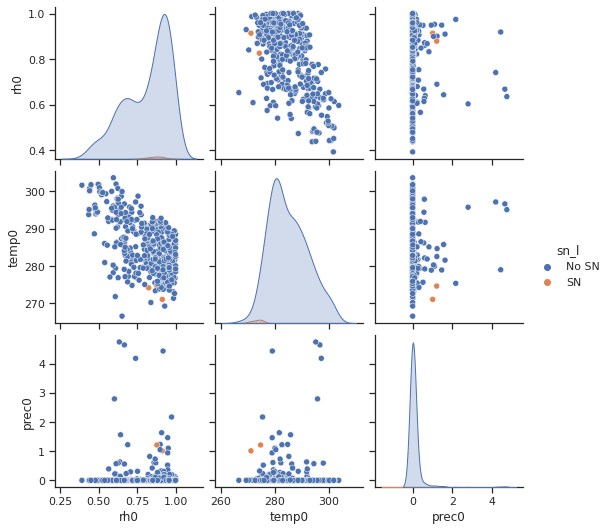

In [9]:
import seaborn as sns
sns.set_theme(style="ticks")

sns.pairplot(df_all1k[["sn_l","rh0","temp0","prec0"]].sample(400), hue="sn_l");

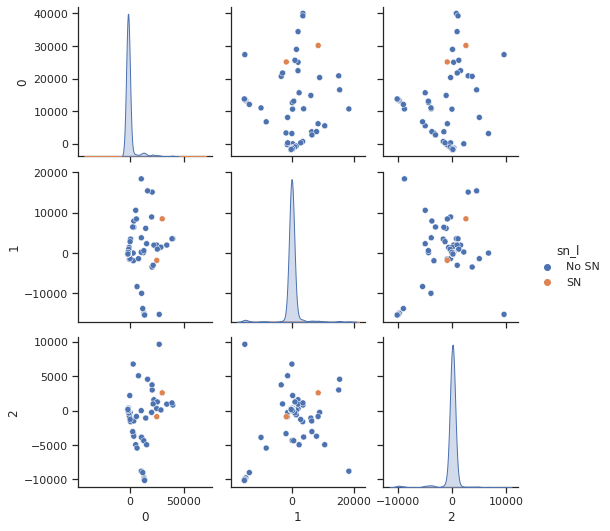

In [12]:
from sklearn.decomposition import PCA

df_pca = pd.DataFrame(PCA(n_components=3).fit_transform(df_all1k.iloc[:,1:]),
                                                        index =df_all1k.index)
df_pca["sn_l"] = df_all1k.sn_l
sns.pairplot(df_pca.sample(400), hue="sn_l");

In [14]:
from sklearn.model_selection import train_test_split
import lazypredict
from lazypredict.Supervised import LazyClassifier

# X and Y
Y = df_all1k.sn_l
X = df_all1k.iloc[:,1:]

X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, )


multiple_model = LazyClassifier(verbose =0, ignore_warnings = True,predictions=True)
models,predictions = multiple_model.fit(X_train,X_test,y_train,y_test)


100%|██████████| 29/29 [00:20<00:00,  1.41it/s]


In [15]:
models

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
GaussianNB,0.88,0.90,None,0.93,0.07
BernoulliNB,0.84,0.80,None,0.91,0.10
LabelSpreading,1.00,0.79,None,1.00,4.34
LabelPropagation,1.00,0.79,None,1.00,2.95
ExtraTreesClassifier,1.00,0.75,None,1.00,0.46
AdaBoostClassifier,1.00,0.75,None,0.99,3.42
LGBMClassifier,1.00,0.75,None,0.99,1.16
DecisionTreeClassifier,0.99,0.75,None,0.99,0.35
PassiveAggressiveClassifier,0.99,0.71,None,0.99,0.09


**Meteorological model independent variables X**

In [16]:
df_all1k.iloc[:,1:].columns

Index(['dir0', 'snow_prec0', 'snowlevel0', 'mod0', 'wind_gust0', 'mslp0',
       'temp0', 'rh0', 'visibility0', 'lhflx0', 'lwflx0', 'conv_prec0',
       'prec0', 'swflx0', 'shflx0', 'cape0', 'cin0', 'cfh0', 'cfl0', 'cfm0',
       'cft0', 'HGT5000', 'HGT8500', 'T5000', 'T8500', 'dir1', 'snow_prec1',
       'snowlevel1', 'mod1', 'wind_gust1', 'mslp1', 'temp1', 'rh1',
       'visibility1', 'lhflx1', 'lwflx1', 'conv_prec1', 'prec1', 'swflx1',
       'shflx1', 'cape1', 'cin1', 'cfh1', 'cfl1', 'cfm1', 'cft1', 'HGT5001',
       'HGT8501', 'T5001', 'T8501', 'dir2', 'snow_prec2', 'snowlevel2', 'mod2',
       'wind_gust2', 'mslp2', 'temp2', 'rh2', 'visibility2', 'lhflx2',
       'lwflx2', 'conv_prec2', 'prec2', 'swflx2', 'shflx2', 'cape2', 'cin2',
       'cfh2', 'cfl2', 'cfm2', 'cft2', 'HGT5002', 'HGT8502', 'T5002', 'T8502'],
      dtype='object')

**ML LGBMClassifier. Samples 10. Heidke Skill score. Significance level (alpha) = 0.01 for normality test of HSS samples**


Confusion matrix (Machine Learning)

col_0  No SN  SN   All
sn_l                  
No SN   1651   5  1656
SN         2   8    10
All     1653  13  1666
Heidke Skill Score: 0.69

Quality report (Machine Learning)

              precision  recall  f1-score  support
No SN              1.00    1.00      1.00  1656.00
SN                 0.62    0.80      0.70    10.00
accuracy           1.00    1.00      1.00     1.00
macro avg          0.81    0.90      0.85  1666.00
weighted avg       1.00    1.00      1.00  1666.00

Confusion matrix (Machine Learning)

col_0  No SN  SN   All
sn_l                  
No SN   1648   6  1654
SN         5   7    12
All     1653  13  1666
Heidke Skill Score: 0.56

Quality report (Machine Learning)

              precision  recall  f1-score  support
No SN              1.00    1.00      1.00  1654.00
SN                 0.54    0.58      0.56    12.00
accuracy           0.99    0.99      0.99     0.99
macro avg          0.77    0.79      0.78  1666.00
weighted av

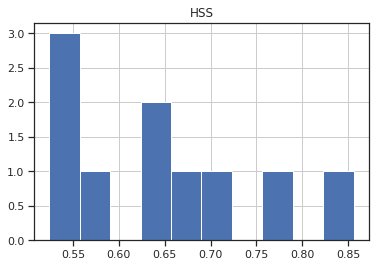

In [18]:
from lightgbm.sklearn import LGBMClassifier
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report
from scipy.stats import shapiro

#random seed 1
np.random.seed(31)

# X and Y
Y = df_all1k.sn_l
X = df_all1k.iloc[:,1:]

# loop random
HSS = []
for t in range (0,10):

  #split variables
  X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, )

  # Resample
  X_res, y_res = SMOTE().fit_resample(X_train,y_train)

  #train model
  ml_model = LGBMClassifier(n_estimators=200).fit(X_res,y_res)

  #Confusion matrix
  print("\nConfusion matrix (Machine Learning)\n")

  cm = pd.crosstab(y_test, ml_model.predict(X_test),margins=True,)
  print(cm)
  a = cm.values[0,0]
  b = cm.values[1,0]
  c = cm.values[0,1]
  d = cm.values[1,1]
  HSS.append(2*(a*d-b*c)/((a+c)*(c+d)+(a+b)*(b+d)))
  print("Heidke Skill Score:",round(HSS[t],2))

  #quality report
  print("\nQuality report (Machine Learning)\n")
  print(pd.DataFrame(classification_report(y_test, ml_model.predict(X_test),output_dict=True)).T)

print("\nHSS stadistics")
# if p-value is lower than 5%, we can reject the null hypothesis of the normality of the dataset

print(pd.DataFrame(HSS,columns=["HSS"]).describe())

#sample less 5000
sta, p = shapiro(HSS)
print("\np value:",p)
#significance level alpha=0.01
alpha = 0.01
if p>alpha:
  print("Accept null hypothesis: normal distribution variable HSS in the samples")
else:
  print("Reject null Hypothesis. Alternative hypothesis variable HSS no normal distribution in samples")  

pd.DataFrame(HSS,columns=["HSS"]).hist();

**Add time features**

In [19]:
df_all1k["hour"] = df_all1k.index.hour
df_all1k["month"] = df_all1k.index.month
df_all1k["dayofyear"] = df_all1k.index.dayofyear
df_all1k["weekofyear"] = df_all1k.index.isocalendar().week.astype(int) 

In [20]:
df_all1k.iloc[:,1:].columns

Index(['dir0', 'snow_prec0', 'snowlevel0', 'mod0', 'wind_gust0', 'mslp0',
       'temp0', 'rh0', 'visibility0', 'lhflx0', 'lwflx0', 'conv_prec0',
       'prec0', 'swflx0', 'shflx0', 'cape0', 'cin0', 'cfh0', 'cfl0', 'cfm0',
       'cft0', 'HGT5000', 'HGT8500', 'T5000', 'T8500', 'dir1', 'snow_prec1',
       'snowlevel1', 'mod1', 'wind_gust1', 'mslp1', 'temp1', 'rh1',
       'visibility1', 'lhflx1', 'lwflx1', 'conv_prec1', 'prec1', 'swflx1',
       'shflx1', 'cape1', 'cin1', 'cfh1', 'cfl1', 'cfm1', 'cft1', 'HGT5001',
       'HGT8501', 'T5001', 'T8501', 'dir2', 'snow_prec2', 'snowlevel2', 'mod2',
       'wind_gust2', 'mslp2', 'temp2', 'rh2', 'visibility2', 'lhflx2',
       'lwflx2', 'conv_prec2', 'prec2', 'swflx2', 'shflx2', 'cape2', 'cin2',
       'cfh2', 'cfl2', 'cfm2', 'cft2', 'HGT5002', 'HGT8502', 'T5002', 'T8502',
       'hour', 'month', 'dayofyear', 'weekofyear'],
      dtype='object')

In [22]:
# X and Y
Y = df_all1k.sn_l
X = df_all1k.iloc[:,1:]

X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, )

multiple_model = LazyClassifier(verbose =0, ignore_warnings = True,predictions=True)
models,predictions = multiple_model.fit(X_train,X_test,y_train,y_test)
models

100%|██████████| 29/29 [00:22<00:00,  1.31it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
GaussianNB,0.90,0.95,None,0.94,0.07
BernoulliNB,0.84,0.81,None,0.90,0.10
NearestCentroid,0.97,0.81,None,0.98,0.18
RandomForestClassifier,1.00,0.79,None,1.00,2.47
BaggingClassifier,1.00,0.79,None,1.00,2.24
ExtraTreesClassifier,1.00,0.79,None,1.00,0.46
LGBMClassifier,1.00,0.75,None,1.00,1.19
AdaBoostClassifier,0.99,0.75,None,0.99,4.78
DecisionTreeClassifier,0.99,0.75,None,0.99,0.40



Confusion matrix (Machine Learning)

col_0  No SN  SN   All
sn_l                  
No SN   1654   2  1656
SN         3   7    10
All     1657   9  1666
Heidke Skill Score: 0.74

Quality report (Machine Learning)

              precision  recall  f1-score  support
No SN              1.00    1.00      1.00  1656.00
SN                 0.78    0.70      0.74    10.00
accuracy           1.00    1.00      1.00     1.00
macro avg          0.89    0.85      0.87  1666.00
weighted avg       1.00    1.00      1.00  1666.00

Confusion matrix (Machine Learning)

col_0  No SN  SN   All
sn_l                  
No SN   1648   6  1654
SN         6   6    12
All     1654  12  1666
Heidke Skill Score: 0.5

Quality report (Machine Learning)

              precision  recall  f1-score  support
No SN              1.00    1.00      1.00  1654.00
SN                 0.50    0.50      0.50    12.00
accuracy           0.99    0.99      0.99     0.99
macro avg          0.75    0.75      0.75  1666.00
weighted avg

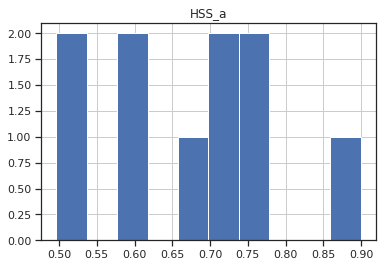

In [24]:
from lightgbm.sklearn import LGBMClassifier
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report
from scipy.stats import shapiro

#random seed 1
np.random.seed(31)

# X and Y
Y = df_all1k.sn_l
X = df_all1k.iloc[:,1:]

# loop random
HSS_a = []
for t in range (0,10):

  #split variables
  X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, )

  # Resample
  X_res, y_res = SMOTE().fit_resample(X_train,y_train)

  #train model
  ml_model = LGBMClassifier(n_estimators=200).fit(X_res,y_res)

  #Confusion matrix
  print("\nConfusion matrix (Machine Learning)\n")

  cm = pd.crosstab(y_test, ml_model.predict(X_test),margins=True,)
  print(cm)
  a = cm.values[0,0]
  b = cm.values[1,0]
  c = cm.values[0,1]
  d = cm.values[1,1]
  HSS_a.append(2*(a*d-b*c)/((a+c)*(c+d)+(a+b)*(b+d)))
  print("Heidke Skill Score:",round(HSS_a[t],2))

  #quality report
  print("\nQuality report (Machine Learning)\n")
  print(pd.DataFrame(classification_report(y_test, ml_model.predict(X_test),output_dict=True)).T)

print("\nHSS stadistics")
# if p-value is lower than 1%, we can reject the null hypothesis of the normality of the dataset

print(pd.DataFrame(HSS_a,columns=["HSS"]).describe())

#sample less 5000
sta, p = shapiro(HSS_a)
print("\np value:",p)

#significance level alpha=0.01
alpha = 0.01
if p>alpha:
  print("Accept null Hypothesis: normal distribution variable HSS in the samples")
else:
  print("Reject null Hypothesis. Alternative hypothesis variable HSS no normal distribution in samples")  

pd.DataFrame(HSS_a,columns=["HSS_a"]).hist();

**Test association between observed variable and machine learning forecast (Pearson’s chi square test). Significance level (alpha) = 0.01**

In [25]:
from scipy.stats import chi2_contingency

print("Last confusion matrix\n")
print(cm.iloc[0:2,0:2])

#stadistic(sta), pvalue (p), degrees of freedom (dof) and expected values (exp)
sta, p, dof, exp = chi2_contingency(cm.iloc[0:2,0:2])

#degrees of freedoom (rows-1)*(columns-1) to test associationbetween two variables
alpha = 0.01
print('\np-value:',p)
print('Significance level:',alpha)
print('Degres of of freedom: ',dof)
print("Stadistic",sta)

if p<=alpha:
    print("Reject H0,There is an association between machine learning forecast and observed values")
else:
    print("Retain H0,There is no association between machine learning forecast and observed values")

Last confusion matrix

col_0  No SN  SN
sn_l            
No SN   1652   3
SN         3   8

p-value: 2.1034236384209442e-169
Significance level: 0.01
Degres of of freedom:  1
Stadistic 769.6864727562992
Reject H0,There is an association between machine learning forecast and observed values


**T test two related samples. This is a test for the null hypothesis that two related samples have identical HSS means. Alternative hypothesis the mean of the distribution underlying the sample without time variables is less than the mean of the distribution underlying the sample with time variables. Significance level (alpha) = 0.01**

In [26]:
from scipy import stats

alpha = 0.01
sta, p_value = stats.ttest_rel(HSS, HSS_a, alternative="less")

print("\nmeans without time variables:", np.round(HSS,2))
print("\nmeans with time variables:", np.round(HSS_a,2))

print("\nalpha: ",alpha)

print("\np_value point: ",p_value)
if p_value < alpha:    
    print("\nwe are rejecting null hypothesis  H0: HHS mean without time variables = HSS mean with time variables")
    print("\nwe are accepting alternative hypothesis: the HSS mean of the sample without time variables inputs is less than the HSS mean of the sample with time variables inputs")
else:
    print("\nwe are accepting null hypothesis:  H0: HSS mean without time variables = HSS mean with time variables ")


means without time variables: [0.69 0.56 0.86 0.58 0.53 0.64 0.63 0.66 0.52 0.76]

means with time variables: [0.74 0.5  0.9  0.69 0.53 0.76 0.6  0.75 0.59 0.73]

alpha:  0.01

p_value point:  0.06679751507574391

we are accepting null hypothesis:  H0: HSS mean without time variables = HSS mean with time variables 


In [27]:
import pickle
from sklearn.pipeline import Pipeline

estimators = [('ml_model', ml_model)]
pipe = Pipeline(estimators)
print(pipe)
al_file={"x_var":X.columns,"coor":coor,"pipe":pipe}
pickle.dump(al_file, open("sn_LEPP_d0.al", 'wb'))

Pipeline(steps=[('ml_model', LGBMClassifier(n_estimators=200))])


In [ ]:
import sklearn
print(sklearn.__version__)

0.24.1


**Best algorithm too heavy to upload in github!!**

In [28]:
df_all1k.iloc[:,1:].columns

Index(['dir0', 'snow_prec0', 'snowlevel0', 'mod0', 'wind_gust0', 'mslp0',
       'temp0', 'rh0', 'visibility0', 'lhflx0', 'lwflx0', 'conv_prec0',
       'prec0', 'swflx0', 'shflx0', 'cape0', 'cin0', 'cfh0', 'cfl0', 'cfm0',
       'cft0', 'HGT5000', 'HGT8500', 'T5000', 'T8500', 'dir1', 'snow_prec1',
       'snowlevel1', 'mod1', 'wind_gust1', 'mslp1', 'temp1', 'rh1',
       'visibility1', 'lhflx1', 'lwflx1', 'conv_prec1', 'prec1', 'swflx1',
       'shflx1', 'cape1', 'cin1', 'cfh1', 'cfl1', 'cfm1', 'cft1', 'HGT5001',
       'HGT8501', 'T5001', 'T8501', 'dir2', 'snow_prec2', 'snowlevel2', 'mod2',
       'wind_gust2', 'mslp2', 'temp2', 'rh2', 'visibility2', 'lhflx2',
       'lwflx2', 'conv_prec2', 'prec2', 'swflx2', 'shflx2', 'cape2', 'cin2',
       'cfh2', 'cfl2', 'cfm2', 'cft2', 'HGT5002', 'HGT8502', 'T5002', 'T8502',
       'hour', 'month', 'dayofyear', 'weekofyear'],
      dtype='object')

In [30]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report

#random seed 1
np.random.seed(31)

# X and Y
Y = df_all1k.sn_l
X = df_all1k.iloc[:,1:]

# loop random
HSS_b = []
for t in range (0,10):
  #split variables
  X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.15, )

  # Resample
  X_res, y_res = SMOTE().fit_resample(X_train,y_train)

  ml_model = ExtraTreesClassifier(n_estimators=150).fit(X_res,y_res)

  #Confussion matrix

  print("\nConfusion matrix (Machine Learning)\n")

  cm = pd.crosstab(y_test, ml_model.predict(X_test),margins=True,)
  print(cm)
  a = cm.values[0,0]
  b = cm.values[1,0]
  c = cm.values[0,1]
  d = cm.values[1,1]
  HSS_b.append(2*(a*d-b*c)/((a+c)*(c+d)+(a+b)*(b+d)))
  print("Heidke Skill Score:",round(HSS_b[t],2))

  #quality report

  print("\nQuality report (Machine Learning)\n")
  print(pd.DataFrame(classification_report(y_test, ml_model.predict(X_test),output_dict=True)).T)

print("\nHSS stadistics")
pd.DataFrame(HSS_b,columns=["HSS"]).describe()


Confusion matrix (Machine Learning)

col_0  No SN  SN   All
sn_l                  
No SN   1242   1  1243
SN         0   7     7
All     1242   8  1250
Heidke Skill Score: 0.93

Quality report (Machine Learning)

              precision  recall  f1-score  support
No SN              1.00    1.00      1.00  1243.00
SN                 0.88    1.00      0.93     7.00
accuracy           1.00    1.00      1.00     1.00
macro avg          0.94    1.00      0.97  1250.00
weighted avg       1.00    1.00      1.00  1250.00

Confusion matrix (Machine Learning)

col_0  No SN  SN   All
sn_l                  
No SN   1237   1  1238
SN         4   8    12
All     1241   9  1250
Heidke Skill Score: 0.76

Quality report (Machine Learning)

              precision  recall  f1-score  support
No SN              1.00    1.00      1.00  1238.00
SN                 0.89    0.67      0.76    12.00
accuracy           1.00    1.00      1.00     1.00
macro avg          0.94    0.83      0.88  1250.00
weighted av

,HSS
count,10.00
mean,0.74
std,0.10
min,0.57
25%,0.73
50%,0.75
75%,0.77
max,0.93


**T test two related samples. This is a test for the null hypothesis that two related samples have identical HSS means. Alternative hypothesis the mean of the distribution underlying the sample without time variables is less than the mean of the distribution underlying the sample with time variables. Significance level (alpha) = 0.01**

In [31]:
from scipy import stats

alpha = 0.01
sta, p_value = stats.ttest_rel(HSS_a, HSS_b, alternative="less")

print("\nHSS LGBMClassifier:", np.round(HSS_a,2))
print("\nHSS ExtraTreesClassifier:", np.round(HSS_b,2))

print("\nalpha: ",alpha)

print("\np_value point: ",p_value)
if p_value < alpha:    
    print("\nwe are rejecting null hypothesis  H0: HHS mean ExtraTreesClassifier = HSS mean with LGBMClassifier")
    print("\nwe are accepting alternative hypothesis: the HSS mean of the sample LGBMClassifier is less than the HSS mean of the sample with ExtraTreesClassifier")
else:
    print("\nwe are accepting null hypothesis:  H0: HSS mean LGBMClassifier = HSS mean with ExtraTreesClassifier")


HSS LGBMClassifier: [0.74 0.5  0.9  0.69 0.53 0.76 0.6  0.75 0.59 0.73]

HSS ExtraTreesClassifier: [0.93 0.76 0.75 0.61 0.73 0.73 0.75 0.8  0.77 0.57]

alpha:  0.01

p_value point:  0.11835050099710748

we are accepting null hypothesis:  H0: HSS mean LGBMClassifier = HSS mean with ExtraTreesClassifier


**PCA components**

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler

#random seed 1
np.random.seed(31)

# X and Y
Y = df_all1k.brfg_l
X = df_all1k.iloc[:,1:]

# loop random
HSS_pca = []
for t in range (0,10):
  #split variables
  X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.15, )

  # Resample
  X_res, y_res = SMOTE().fit_resample(X_train,y_train)

  #scaler
  sc = StandardScaler().fit(X_res)
  X_sc = sc.transform(X_res)

  #PCA
  n_components = len(X.columns)
  pca = PCA(n_components).fit(X_sc)
  X_pca = pca.transform(X_sc)

  #machine learning model
  #ml_model = ExtraTreesClassifier(n_estimators=150).fit(X_pca,y_res)
  ml_model = MLPClassifier(hidden_layer_sizes=(100,50,10)).fit(X_pca,y_res)
  
  #Confusion matrix
  print("\nConfusion matrix (Machine Learning)\n")

  y_pca = pca.transform(sc.transform(X_test))
  cm = pd.crosstab(y_test, ml_model.predict(y_pca),margins=True,)
  print(cm)
  a = cm.values[0,0]
  b = cm.values[1,0]
  c = cm.values[0,1]
  d = cm.values[1,1]
  HSS_pca.append(2*(a*d-b*c)/((a+c)*(c+d)+(a+b)*(b+d)))
  print("Heidke Skill Score:",round(HSS_pca[t],2))

  #quality report

  print("\nQuality report (Machine Learning)\n")
  print(pd.DataFrame(classification_report(y_test, ml_model.predict(y_pca),output_dict=True)).T)

print("\nHSS stadistics")
pd.DataFrame(HSS_pca,columns=["HSS_pca"]).describe()


Confusion matrix (Machine Learning)

col_0     BR/FG  No BR/FG   All
brfg_l                         
BR/FG       287       150   437
No BR/FG    179      1855  2034
All         466      2005  2471
Heidke Skill Score: 0.55

Quality report (Machine Learning)

              precision    recall  f1-score      support
BR/FG          0.615880  0.656751  0.635659   437.000000
No BR/FG       0.925187  0.911996  0.918544  2034.000000
accuracy       0.866856  0.866856  0.866856     0.866856
macro avg      0.770533  0.784373  0.777102  2471.000000
weighted avg   0.870486  0.866856  0.868516  2471.000000

Confusion matrix (Machine Learning)

col_0     BR/FG  No BR/FG   All
brfg_l                         
BR/FG       288       173   461
No BR/FG    208      1802  2010
All         496      1975  2471
Heidke Skill Score: 0.51

Quality report (Machine Learning)

              precision    recall  f1-score      support
BR/FG          0.580645  0.624729  0.601881   461.000000
No BR/FG       0.912405  0

,HSS_pca
count,10.000000
mean,0.563400
std,0.029173
min,0.506431
25%,0.553074
50%,0.562969
75%,0.584901
max,0.604646
